<a href="https://colab.research.google.com/github/PGV1000/DeepLearning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%20%E2%84%962/DeepNN_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%94_%D0%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np
!pip install --upgrade gdown
!gdown --id 10EGlLf-Jj0Izben6B9yDoIi8xPGDnkC0




# data_url = "https://www.kaggle.com/datasets/puxama/bostoncsv"
# df = pd.read_csv(data_url)
# df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
# df.head()

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10EGlLf-Jj0Izben6B9yDoIi8xPGDnkC0
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 265kB/s]


In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d puxama/bostoncsv

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 29.5MB/s]


In [5]:
!unzip bostoncsv.zip

Archive:  bostoncsv.zip
  inflating: Boston.csv              


In [6]:
df = pd.read_csv("Boston.csv")
x = df.drop(['Unnamed: 0', 'medv'], axis=1)
y = df['medv']

x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
print(x.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, y_train.shape

((404, 13), (404,))

#### 1.2. Проектируем архитектуру для этой задачи

In [9]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.transform(x_test)

In [10]:
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [11]:
# Ваш код

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam


model = Sequential([
    Dense(26, input_shape=(13,), activation='relu'),
    Dense(13, input_shape=(), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 729 (2.85 KB)
Trainable params: 729 (2.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [12]:
# Ваш код
SPEED = 0.1
EPOCHS = 40
model.compile(optimizer=Adam(learning_rate=SPEED), loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [13]:
history = model.fit(x_train_n, y_train, validation_data=(x_test_n, y_test), epochs=EPOCHS)

Epoch 1/40
13/13 [==============================] - 4s 38ms/step - loss: 247.7151 - mae: 12.4703 - val_loss: 84.6479 - val_mae: 6.4414
Epoch 2/40
13/13 [==============================] - 0s 12ms/step - loss: 74.9953 - mae: 6.2844 - val_loss: 66.2269 - val_mae: 5.8194
Epoch 3/40
13/13 [==============================] - 0s 13ms/step - loss: 54.1917 - mae: 5.2072 - val_loss: 52.3343 - val_mae: 5.8220
Epoch 4/40
13/13 [==============================] - 0s 10ms/step - loss: 40.4473 - mae: 4.4695 - val_loss: 39.2415 - val_mae: 5.1084
Epoch 5/40
13/13 [==============================] - 0s 10ms/step - loss: 31.2088 - mae: 3.7089 - val_loss: 27.9548 - val_mae: 3.8667
Epoch 6/40
13/13 [==============================] - 0s 13ms/step - loss: 22.8662 - mae: 3.1900 - val_loss: 20.1423 - val_mae: 3.1731
Epoch 7/40
13/13 [==============================] - 0s 12ms/step - loss: 22.0223 - mae: 3.1480 - val_loss: 18.5032 - val_mae: 3.1539
Epoch 8/40
13/13 [==============================] - 0s 11ms/step - 

#### 1.6. Делаем предсказания на тестовых данных

In [14]:
# Ваш код
preds = model.predict(x_test_n)

4/4 [==============================] - 0s 3ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [15]:
# Ваш код
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

2.398748528723623

#### 1.8. Строим график обучения

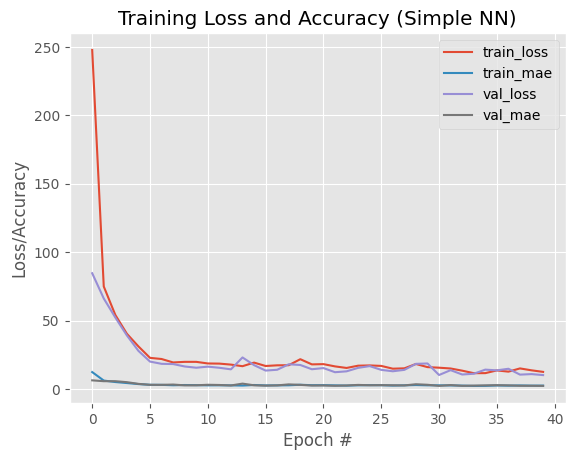

In [16]:
# Ваш код
# строим графики потерь и точности
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
# plt.savefig('plot.png')
# cv2_imshow(cv2.imread("plot.png"))


#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [17]:
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [18]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [42]:
# Ваш код
!pip install gradio

import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="Crime rate", minimum=0, maximum=100, step=0.1, value=8.6),
        gr.Slider(label="Land zoned", minimum=0, maximum=100, step=0.1, value=23.3),
        gr.Slider(label="Non-retail", minimum=0, maximum=50, step=0.1, value=6.8),
        gr.Slider(label="Charles River", minimum=0, maximum=1, step=0.1, value=0.25),
        gr.Slider(label="Nitric Oxides", minimum=0, maximum=1, step=0.1, value=0.11),
        gr.Slider(label="Average rooms", minimum=1, maximum=10, step=0.1, value=0.7),
        gr.Slider(label="Owner-occupied", minimum=1, maximum=100, step=0.1, value=28.1),
        gr.Slider(label="Distance center", minimum=0, maximum=15, step=0.1, value=2.1),
        gr.Slider(label="Radial highway", minimum=1, maximum=50, step=0.1, value=8.7),
        gr.Slider(label="tax-rate per 10k", minimum=100, maximum=1000, step=0.1, value=168.5),
        gr.Slider(label="Pupil-teacher rat.", minimum=1, maximum=50, step=0.1, value=2.1),
        gr.Slider(label="B", minimum=0, maximum=1000, step=0.1, value=91.3),
        gr.Slider(label="Lower status", minimum=1, maximum=50, step=0.1, value=7.2),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://51751c7316379dbd3a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://51751c7316379dbd3a.gradio.live


#### 2. Проверка обученной модели пользовательскими данными

In [20]:
# Ваш код

## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [21]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [22]:
# Ваш код

### 3. Указываем путь к набору данных:

In [23]:
# Ваш код

### 4. Загружаем набор данных и формируем общую выборку:

In [24]:
# Ваш код

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [25]:
# Ваш код

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [26]:
# Ваш код

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [27]:
# Ваш код

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [28]:
# Ваш код

#### 5.3. Компилируем модель:

In [29]:
# Ваш код

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [30]:
# Ваш код

#### 6.2. Запустим процесс обучения модели:

In [31]:
# Ваш код

#### 6.3. Загружаем лучшую модель:

In [32]:
# Ваш код

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [33]:
# Ваш код

#### 7.2. Выведем матрицу ошибок

In [34]:
# Ваш код

#### 7.3. Отобразим график обучения

In [35]:
# Ваш код

### 8. Сохранение модели и меток классов:

In [36]:
# Ваш код

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [37]:
# Ваш код

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [38]:
# Ваш код

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [39]:
# Ваш код

### 10. Визуализируем интерфейс и произведем классификацию:

In [40]:
# Ваш код